# Clustering with k-Means

Clustering is a problem in which we try to identify groups (clusters) of similar objects. One of the main requirements of clustering is that the objects inside a cluster $C$ must be more related to each other than any other object outside $C$.

Clustering can also be considered as a technique for reducing the number of points in a data set (dimensionality reduction). In addition, it can be used as a lossy compression method. In this case, groups of similar (but different) objects are replaced by a representative object, thus reducing the storage requirements of many different objects.

Clustering is one of the main problems of unsupervised learning. The k-Means algorithm is probably the most popular clustering algorithm for general data types.

## Synthetic datasets with Gaussian distribution

In this example we will create and use a synthetic data set. Synthetic datasets do not correspond to an actual status or observation. Instead, they have been created to quickly develop and evaluate, among other things, machine learning algorithms. 

The method [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) of scikit-learn generates a random dataset with Gaussian probability distribution. Its basic input parameters include:

* `n_samples`: the total number of points in the dataset equally divided among clusters.
* `n_features`: The number of features for each sample.
* `centers`: The number of centers to generate, or the fixed center locations.
* `cluster_std`: The standard deviation of the clusters. High values lead to more scattered clusters.
* `random_state`: Determines random number generation for dataset creation. To achieve reproducible output across multiple function calls, we must pass the same integer.


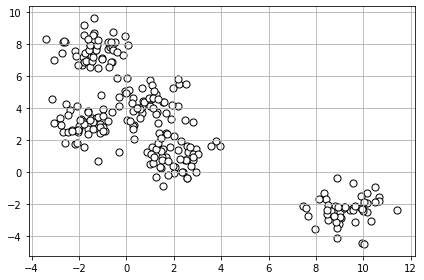

In [1]:
# Avoid the k-Means memory leak in multi-threaded environments
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# This parameter changes the entire notebook
NUM_CLUSTERS = 5

# Create 250 random two-dimensional points and 5 centers.
X, y = make_blobs(n_samples=250, n_features=2, centers=NUM_CLUSTERS, cluster_std=0.8, random_state=0)

# Plot the dataset onto a two dimensional space
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()


## Brief introduction

The k-Means algorithm starts by initializing the `n_clusters` coordinates of the centers. According to the established terminology, these focal points are referred to as centroids. The initial coordinates of the centroids can be random or predefined (see the `init` parameter below).

The distance of each sample from each centroid is then calculated, and each sample is placed in the nearest cluster (centered on the corresponding centroid). After all the samples have been inserted into their respective clusters, the coordinates of the centroids are recalculated by averaging the coordinates of all the elements belonging to the cluster. Then, all the samples are removed from their clusters and the process starts again by calculating the distances of each point from the new centroids.

In the original k-Means the aforementioned distances are Euclidean distances. However, in the relevant literature, additional ways of calculating the distance (or the similarity) have been suggested.

K-Means is an iterative algorithm: The repositioning of the centroids stops either when:

* the algorithm has completed `max_iter` iterations (see below), or
* all centroids move by an infinitesimal margin (i.e. less than `tol`) between two successive iterations.


## k-Means clustering with scikit-learn

We can now apply the algorithm to the aforementioned dataset by importing the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) object from the [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) library of scikit-learn. Apart from [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), this library also includes numerous implementations of other state-of-the-art clustering algorithms.

A portion of the most important parameters of [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) include:

* `n_clusters`: the number of clusters.
* `max_iter`: the maximum number of iterations to perform.
* `n_init`: The number of k-Means executions with different random centroid seeds. This parameter tries to eliminate the bad performances that may occur due to bad initial randomization of the centroids. The final output derives from the best performance among the `n_init` consecutive executions.
* `tol`: Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
* `init`: Method for initializing the cluster centroids:
 * `k-means++`: selects initial cluster centers for k-Means clustering in a smart way to speed up convergence.
 * `random`: choose `n_clusters` observations (rows) at random from data for the initial centroids.
 * `ndarray`: If an array is passed, it should be of shape `(n_clusters, n_features)` and gives the initial centers.
 * `callable`: Centroid initialization by using a custom callback function. The function should take as arguments the data points `X`, the number of clusters `n_clusters` to be created, and a random state. Its output must return an initialization array similar to `ndarray`.



In [2]:
from sklearn.cluster import KMeans

# Initialize k-Means and its hyper-parameters
km = KMeans(n_clusters=NUM_CLUSTERS, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

# Execute k-Means on the data points X
y_km = km.fit_predict(X)

# Print the predicted and real clusters
print("Predicted clusters:\n", y_km)
print("\nReal clusters:\n", y)


Predicted clusters:
 [1 1 0 2 3 0 2 0 4 3 1 0 4 3 2 3 3 1 3 0 0 0 1 2 2 2 0 4 1 2 0 0 3 4 1 3 3
 1 3 3 1 4 2 0 0 4 4 3 0 2 0 2 2 2 4 3 4 1 0 0 0 4 3 4 4 0 1 4 1 0 0 3 1 3
 2 0 3 2 2 1 2 1 0 0 3 0 4 1 3 4 0 4 2 0 1 2 4 3 3 3 1 4 3 0 4 4 0 1 4 0 0
 4 4 2 4 2 0 3 4 1 1 0 3 1 4 4 1 3 3 4 1 1 0 3 3 1 0 2 4 4 3 0 3 2 3 4 3 0
 1 0 2 0 1 4 2 4 4 2 4 3 3 2 2 3 2 1 0 2 3 4 4 1 3 3 0 1 1 2 1 3 2 4 2 2 0
 1 4 2 3 2 2 3 4 1 1 3 2 3 2 4 1 1 2 2 2 1 4 0 1 1 4 4 3 0 4 1 1 0 4 1 4 3
 0 2 4 4 3 0 3 3 0 0 3 2 0 2 2 1 1 2 3 2 0 2 1 4 1 4 2 2]

Real clusters:
 [2 2 0 4 1 0 4 0 3 2 2 0 3 1 4 1 1 2 1 0 0 0 0 4 4 4 0 3 2 4 0 0 1 3 2 1 1
 2 1 1 2 3 4 0 2 3 3 1 0 4 0 4 4 4 3 1 3 2 0 0 0 3 1 3 3 0 2 3 2 0 0 1 2 1
 4 0 1 4 4 2 4 2 0 0 1 0 3 2 1 3 0 3 4 0 2 4 3 1 1 1 2 3 1 0 3 3 0 2 3 0 0
 3 3 4 3 4 0 1 3 2 2 0 1 2 3 3 2 1 1 3 2 2 0 1 1 2 0 4 3 3 1 0 1 4 1 3 1 0
 2 0 4 0 2 3 4 3 3 4 3 1 1 4 4 1 4 2 2 4 1 3 3 2 1 1 0 2 2 4 2 1 4 3 4 4 0
 2 3 4 1 4 4 1 3 2 2 1 4 1 4 3 2 2 4 4 4 2 3 0 2 2 3 3 1 0 3 2 2 0 3 2 3 1
 0 4

## Plot the generated clusters

The following code depicts the 5 clusters that were generated by k-Means. We use different colors and marker styles to paint the data points that belong to each cluster. The red stars represent the centroid points.


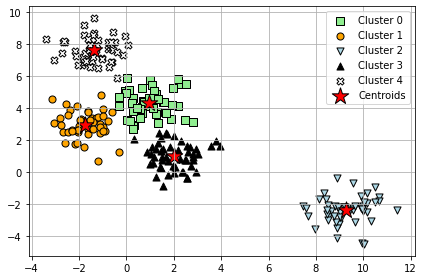

In [3]:
# Place the data points in the plot. Use different colors and marker styles for each cluster.

# Some colors are not compatible with some markers. We will supress all warnings with this command
import warnings
warnings.filterwarnings("ignore")

# Marker styles
markers = [ 's', 'o', 'v', '^', 'X', '.', '<', '>', '1', '2', '3', '4',]

# Colors
colors = [ 'lightgreen', 'orange', 'lightblue', 'black', 'white', 'pink', 'purple', 'brown', 'gray', 'silver', '#ffff00']

for i in range(NUM_CLUSTERS):
    plt.scatter(
        X[y_km == i, 0], X[y_km == i, 1],
        s=50, c=colors[i], marker=markers[i], edgecolor='black', label='Cluster ' + str(i))

# Place the centroids in the plot
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300,
            marker='*', c='red', edgecolor='black', label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


## Estimating the number of clusters with the Elbow method

A major drawback of k-Means is that it requires specifying the number of clusters in order to work properly. Nevertheless, this is often impossible in real unsupervised problems, where the data is completely unknown. This is especially true in cases of multidimensional data, where the visualization is not possible as above.

The Elbow method is a heuristic technique that is used to estimate the number of clusters in a dataset. The method initially plots the clustering distortion (or else, the inertia) as a function of the number of clusters. In the sequel, it identifies the elbow of the resulting curve and selects the number of clusters for which the elbow occurs. This method can also be used to select the number of parameters in other models.

The K-means algorithm aims at selecting centroids that minimize distortion (or inertia), or the criterion for the sum of squares within the cluster:

\begin{equation}
\sum_{i=1}^n \min{||x_i-\mu_j||^2}
\end{equation}

where $||x_i-\mu_j||^2$ represents the Euclidean distance between the $i$-th data point and the the $j$-th centroid point.


In [4]:
# Print the inertia of our k-Means clustering
print('Distortion (inertia): %.3f' % km.inertia_)


Distortion (inertia): 308.649


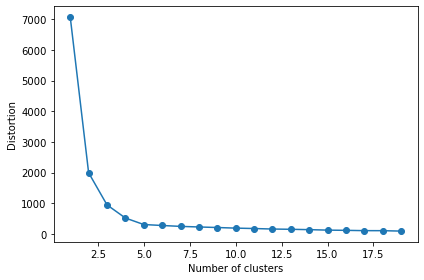

In [5]:
distortions = []

# Run k-Means 20 times for different numbers of initial clusters (notice how n_cluster changes at each step of the loop)
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# Plot the distortions of the 20 k-Means executions
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()


## Evaluating clustering algorithms

In this subsection we briefly introduce some well-established methods for evaluating the performance of clustering algorithms.

### Misclustered elements


In [6]:
# This metric produces WRONG results
print("Misclustered examples: %d" % (y_km != y).sum())
print("Predicted clusters:\n", y_km, "\nReal cluster labels:\n", y, "\n")


Misclustered examples: 202
Predicted clusters:
 [1 1 0 2 3 0 2 0 4 3 1 0 4 3 2 3 3 1 3 0 0 0 1 2 2 2 0 4 1 2 0 0 3 4 1 3 3
 1 3 3 1 4 2 0 0 4 4 3 0 2 0 2 2 2 4 3 4 1 0 0 0 4 3 4 4 0 1 4 1 0 0 3 1 3
 2 0 3 2 2 1 2 1 0 0 3 0 4 1 3 4 0 4 2 0 1 2 4 3 3 3 1 4 3 0 4 4 0 1 4 0 0
 4 4 2 4 2 0 3 4 1 1 0 3 1 4 4 1 3 3 4 1 1 0 3 3 1 0 2 4 4 3 0 3 2 3 4 3 0
 1 0 2 0 1 4 2 4 4 2 4 3 3 2 2 3 2 1 0 2 3 4 4 1 3 3 0 1 1 2 1 3 2 4 2 2 0
 1 4 2 3 2 2 3 4 1 1 3 2 3 2 4 1 1 2 2 2 1 4 0 1 1 4 4 3 0 4 1 1 0 4 1 4 3
 0 2 4 4 3 0 3 3 0 0 3 2 0 2 2 1 1 2 3 2 0 2 1 4 1 4 2 2] 
Real cluster labels:
 [2 2 0 4 1 0 4 0 3 2 2 0 3 1 4 1 1 2 1 0 0 0 0 4 4 4 0 3 2 4 0 0 1 3 2 1 1
 2 1 1 2 3 4 0 2 3 3 1 0 4 0 4 4 4 3 1 3 2 0 0 0 3 1 3 3 0 2 3 2 0 0 1 2 1
 4 0 1 4 4 2 4 2 0 0 1 0 3 2 1 3 0 3 4 0 2 4 3 1 1 1 2 3 1 0 3 3 0 2 3 0 0
 3 3 4 3 4 0 1 3 2 2 0 1 2 3 3 2 1 1 3 2 2 0 1 1 2 0 4 3 3 1 0 1 4 1 3 1 0
 2 0 4 0 2 3 4 3 3 4 3 1 1 4 4 1 4 2 2 4 1 3 3 2 1 1 0 2 2 4 2 1 4 3 4 4 0
 2 3 4 1 4 4 1 3 2 2 1 4 1 4 3 2 2 4 4 4 2 3 0

This way of measuring the performance of a clustering algorithm is not appropriate. The reason is that it performs a direct comparison between the actual and predicted cluster labels.

However, in clustering algorithms we are primarily interested in how the elements are grouped and not in the class label itself. 

### Rand index

The [Rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) is a function that measures the similarity between two groupings ignoring permutations. It takes into consideration all the element pairs and it counts the pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The Rand index does not ensure to obtain a value close to 0.0 for a random labelling. The adjusted Rand index corrects for chance and will give such a baseline.

\begin{equation}
ARI = \frac{RI - E[RI]} {\max(RI) - E[RI]}
\end{equation}

In [7]:
# Rand Index and Adjusted Random Index are two metrics that measure the similarity betweem two groupings
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score

ri = rand_score(y, y_km)
ari = adjusted_rand_score(y, y_km)

print("Rand Index: %.3f" % ri)
print("Adjusted Rand Index: %.3f" % ari)


Rand Index: 0.984
Adjusted Rand Index: 0.951


### Completeness and Homogeneity

The cluster [Completeness](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html) and the cluster [Homogeneity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) constitute two of the most basic evaluation methods.

The first rewards the algorithms that place into the same cluster all the points belonging to the same class. In other words, it shows us whether clusters include all the points they need to include. Notice that Completeness is independent of the absolute values of the labels: a permutation of the class or cluster label values will not change the score value in any way.

The second is a metric of homogeneity of the clusters. It evaluates the ability of an algorithm to create clusters that contain only points that belong to the same (one) class. Similarly, Homogeneity is also independent of the absolute values of the labels.


In [8]:
# Import completeness and Homogeneity
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score

print("Completeness: ", completeness_score(y, y_km))
print("Homogeneity: ", homogeneity_score(y, y_km))


Completeness:  0.9427256428537474
Homogeneity:  0.9425840973510007


### Silhouette Coefficient and Silhouette diagrams

This is another well-established method for measuring the performance of a clustering algorithm.

The Silhouette Coefficient is computed by using the mean intra-cluster distance $\bar{X}_{IC}$ and the mean nearest-cluster distance $\bar{X}_{NC}$ for each sample. Therefore, the Silhouette Coefficient for a single sample is:

\begin{equation}
\mathcal{S} = \frac{(\bar{X}_{NC} - \bar{X}_{IC})} {\max(\bar{X}_{NC}, \bar{X}_{IC})}
\end{equation}

scikit-learn offers two functions:
* [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) that returns the mean Silhouette Coefficient over all samples, and
* [silhouette_samples](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) that computes the Silhouette Coefficient for each sample.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


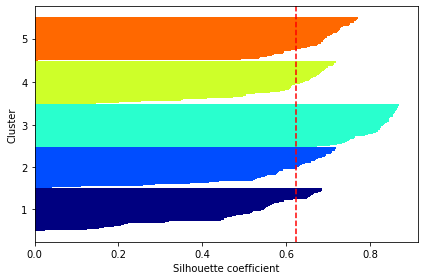

In [9]:
# Compute the Silhouette Coefficient and plot the Silhouette diagram for a k-Means clustering
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

# Initialize k-Means
km = KMeans(n_clusters=NUM_CLUSTERS, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

# Execute k-Means
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# Store the Silhouette Coefficient for each data point into a NumPy array.
# The aforementioned intra-cluster and nearest-cluster distances are computed by using the Euclidean distance metric.
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

# Iterate through each cluster label
for i, c in enumerate(cluster_labels):
    # Slice and sort the Silhouette Coefficients
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# Compute the average Silhouette Coefficient and draw the vertical red dashed line
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()


Now let us compare the above diagram with a diagram that derives from a bad k-Means execution. One easy way to make k-Means produce low-quality clusterings, is to use an initial number of clusters that is highly different than the real number.

Therefore, in the example below we execute k-Means with 10 initial clusters instead of 5:


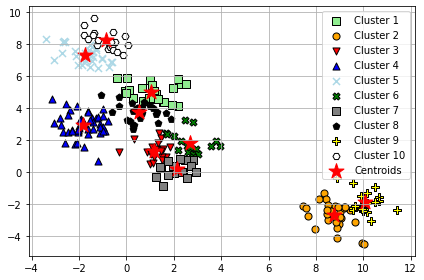

In [10]:
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='red', edgecolor='black', marker='v', label='Cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='blue', edgecolor='black', marker='^', label='Cluster 4')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s=50, c='lightblue', edgecolor='black', marker='x', label='Cluster 5')
plt.scatter(X[y_km == 5, 0], X[y_km == 5, 1], s=50, c='green', edgecolor='black', marker='X', label='Cluster 6')
plt.scatter(X[y_km == 6, 0], X[y_km == 6, 1], s=50, c='gray', edgecolor='black', marker='s', label='Cluster 7')
plt.scatter(X[y_km == 7, 0], X[y_km == 7, 1], s=50, c='black', edgecolor='black', marker='p', label='Cluster 8')
plt.scatter(X[y_km == 8, 0], X[y_km == 8, 1], s=50, c='yellow', edgecolor='black', marker='P', label='Cluster 9')
plt.scatter(X[y_km == 9, 0], X[y_km == 9, 1], s=50, c='white', edgecolor='black', marker='H', label='Cluster 10')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

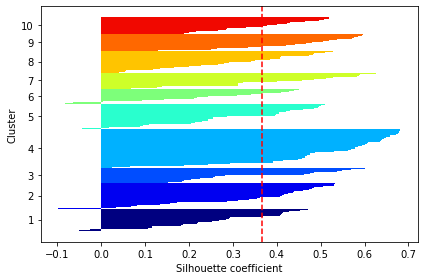

In [11]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

## Exercises

Apart from [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), scikit-learn provides additional methods for creating synthetic datasets. Two representative examples are [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), and [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). Examples of these two methods are depicted in the figures below.

Execute and evaluate k-Means in these types of datasets.


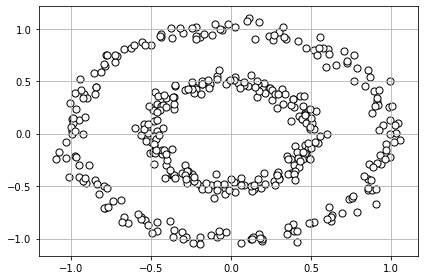

In [12]:
from IPython.display import Image
Image(filename='circles.png', width=400)


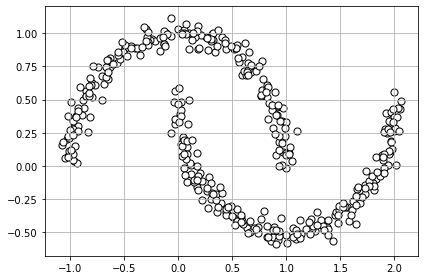

In [13]:
Image(filename='moons.png', width=400)
